In [1]:
import math 
import matplotlib.pyplot as plt
import numpy as np 
import torch 
from torch.autograd import Variable
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim

In [7]:
n = 2500
d = 1
t = 1
x_train = np.random.uniform(0, 1, (n, d)).astype(np.float32)
noise = np.random.uniform(-0.1, 0.1, (n, d)).astype(np.float32)
y_train = x_train + 0.3*np.sin(2*np.pi*x_train) + noise

In [8]:
x = Variable(torch.from_numpy(x_train))
y = Variable(torch.from_numpy(y_train))

# Now let's inverse are Data

### x = y + 0.3sin(2piy) + noise

In [9]:
x_train_inv = y_train
y_train_inv = x_train
x_test = np.linspace(-0.1, 1.1, n).reshape(-1, 1).astype(np.float32)

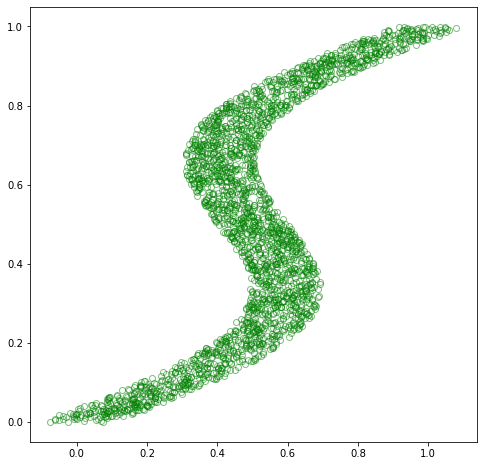

In [10]:
fig = plt.figure(figsize=(8, 8))
plt.plot(x_train_inv, y_train_inv, 'go', alpha=0.5, markerfacecolor='none')
plt.show()

In [11]:
h = 15
w1 = Variable(torch.randn(d, h) * np.sqrt(1/d), requires_grad=True)
b1 = Variable(torch.zeros(1, h), requires_grad=True)
w2 = Variable(torch.randn(h, t) * np.sqrt(1/h), requires_grad=True)
b2 = Variable(torch.zeros(1, t), requires_grad=True)

def forward(x):
  out = torch.tanh(x.mm(w1) + b1)
  out = out.mm(w2) + b2
  return out

x = Variable(torch.from_numpy(x_train_inv))
y = Variable(torch.from_numpy(y_train_inv))

In [13]:
opt = optim.Adam([w1, b1, w2, b2], lr=0.09)

for e in range(2000):
  opt.zero_grad()
  out = forward(x)
  loss = F.mse_loss(out, y)  # negative log likelihood assuming a Gaussian distribution
  if e % 100 == 0:
    print(e, loss.item())
  loss.backward()
  opt.step()

0 0.556908130645752
100 0.04810887575149536
200 0.047889381647109985
300 0.0477578230202198
400 0.04762539640069008
500 0.04737347364425659
600 0.04665758088231087
700 0.0454990454018116
800 0.04488002136349678
900 0.04417533054947853
1000 0.04323067516088486
1100 0.04407069832086563
1200 0.04081806540489197
1300 0.04022691771388054
1400 0.03926970064640045
1500 0.03947461023926735
1600 0.0389019213616848
1700 0.03867601603269577
1800 0.038621190935373306
1900 0.03870605677366257


In [14]:
out = forward(Variable(torch.from_numpy(x_test)))

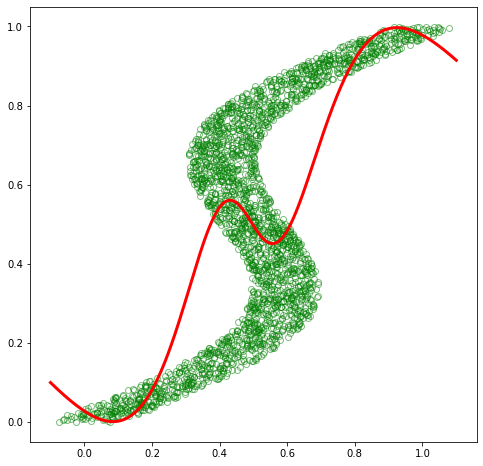

In [15]:
fig = plt.figure(figsize=(8, 8))
plt.plot(x_train_inv, y_train_inv, 'go', alpha=0.5, markerfacecolor='none')
plt.plot(x_test, out.data.numpy(), 'r', linewidth=3.0)
plt.show()

## A Single Gaussian Distribution Failed to Approximate the multimodal Conditional Distribution